<a href="https://colab.research.google.com/github/madhavjk/DataScience-ML_and_DL/blob/main/SESSION_22_(ENSEMBLE_METHODS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [ ]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data.drop(["label"],axis = 1).values
Y = train_data[["label"]].values

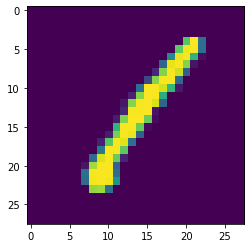

In [ ]:
plt.imshow(X[0].reshape([28,28]))

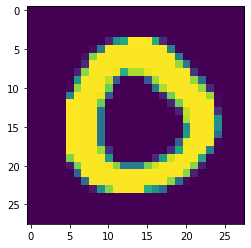

In [ ]:
plt.imshow(X[4].reshape([28,28]))

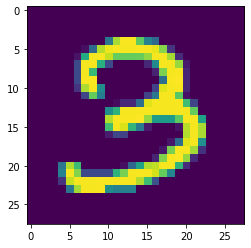

In [ ]:
plt.imshow(X[14].reshape([28,28]))

In [ ]:
X = X[:3001]
Y = Y[:3001]
print(X.shape)
print(Y.shape)

(3001, 784)
(3001, 1)


In [ ]:
X = X/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 14)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2550, 784)
(2550, 1)
(451, 784)
(451, 1)


## Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 8, random_state = 14)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=14, splitter='best')

In [ ]:
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9450980392156862
Testing Accuracy : 0.7339246119733924


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 10, random_state =14)
rf_classifier.fit(x_train, y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)

In [ ]:
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)

In [ ]:
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9952941176470588
Testing Accuracy : 0.8802660753880266


## XGBoost

In [ ]:
import xgboost as xgb
xg_classifier = xgb.XGBClassifier(n_estimators = 5)

In [ ]:
xg_classifier.fit(x_train,y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
pred_train = xg_classifier.predict(x_train)
pred_test = xg_classifier.predict(x_test)

In [ ]:
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9878431372549019
Testing Accuracy : 0.8869179600886918


## LightGBM

In [ ]:
import lightgbm as lgb
lg_classifier = lgb.LGBMClassifier(n_estimators=5)
lg_classifier.fit(x_train,y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=5, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred_train = lg_classifier.predict(x_train)
pred_test = lg_classifier.predict(x_test)

In [ ]:
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9752941176470589
Testing Accuracy : 0.8736141906873615


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [('dt',dt_classifier),('rf',rf_classifier),('xgb',xg_classifier),('lgbm',lg_classifier)],voting = 'hard')

In [ ]:
vt_classifier.fit(x_train,y_train)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=8,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=14,
                                                     splitter='best')),
        

In [ ]:
pred_train = vt_classifier.predict(x_train)
pred_test = vt_classifier.predict(x_test)

In [ ]:
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9937254901960785
Testing Accuracy : 0.8957871396895787
